# ESCUELA POLITÉCNICA NACIONAL

![](logoEpn.jpg){width=3cm height=3cm fig-align="center"}

# Taller 02: Cálculo de raíces

## Ejercicio 1

Encuentre todas las raíces del polinomio $$
x^4 + 540x^3 + 109124x^2 + 9781632x + 328188672 = 0
$$

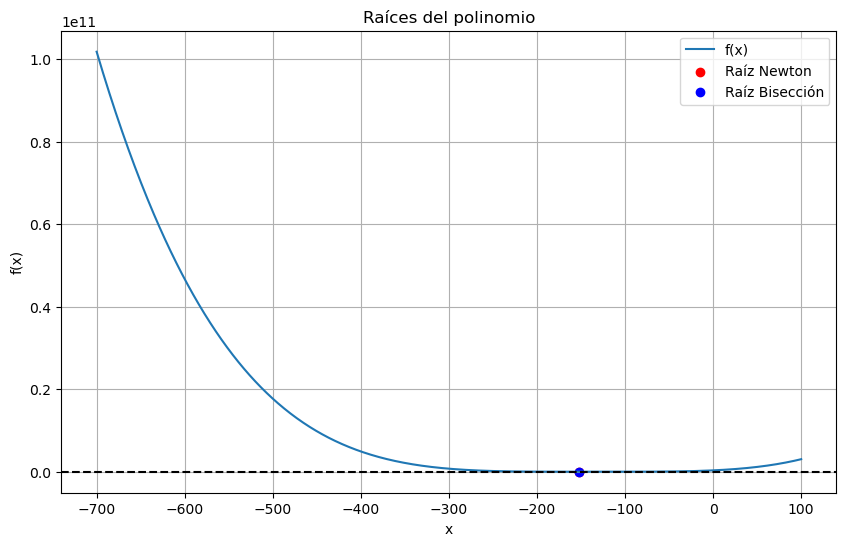

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display


def f(x): # Polinomio
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def fprime(x): # Derivada
    return 4*x**3 + 1620*x**2 + 218248*x + 9781632

# Método de Newton
x0_newton = -600
steps_newton = [x0_newton]
for _ in range(10):
    x_next = steps_newton[-1] - f(steps_newton[-1]) / fprime(steps_newton[-1])
    steps_newton.append(x_next)

# Buscar intervalos válidos para Bisección
def find_valid_intervals(f, x_vals):
    intervals = []
    for i in range(len(x_vals) - 1):
        a, b = x_vals[i], x_vals[i+1]
        if f(a) * f(b) < 0:
            intervals.append((a, b))
    return intervals

x_scan = np.linspace(-700, 100, 1000)
valid_intervals = find_valid_intervals(f, x_scan)
a_bisect, b_bisect = valid_intervals[0]
root_bisect = optimize.bisect(f, a_bisect, b_bisect)

# Pasos de Bisección para animación
steps_bisect = [(a_bisect, b_bisect)]
for _ in range(10):
    a, b = steps_bisect[-1]
    c = (a + b) / 2
    if f(a) * f(c) < 0:
        steps_bisect.append((a, c))
    else:
        steps_bisect.append((c, b))

# Gráfica del polinomio y raíces
x_vals = np.linspace(-700, 100, 1000)
y_vals = f(x_vals)
root_newton = optimize.newton(f, x0_newton, fprime=fprime)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)')
plt.axhline(0, color='black', linestyle='--')
plt.scatter([root_newton], [0], color='red', label='Raíz Newton')
plt.scatter([root_bisect], [0], color='blue', label='Raíz Bisección')
plt.title('Raíces del polinomio')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

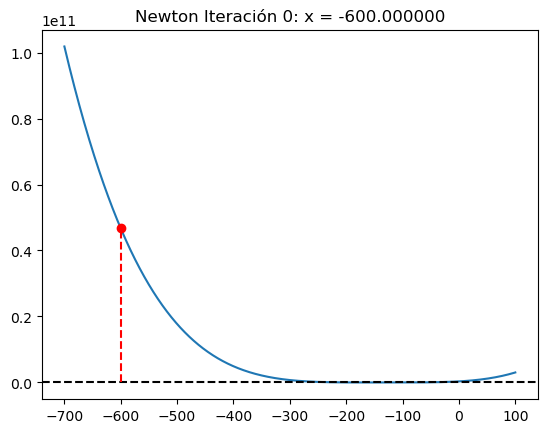

In [54]:
# Animación Newton
fig, ax = plt.subplots()
ax.plot(x_vals, y_vals)
ax.axhline(0, color='black', linestyle='--')
point, = ax.plot([], [], 'ro')
line, = ax.plot([], [], 'r--')

def update_newton(i):
    x = steps_newton[i]
    y = f(x)
    point.set_data([x], [y])
    line.set_data([x, x], [0, y])
    ax.set_title(f'Newton Iteración {i}: x = {x:.6f}')
    return point, line

ani_newton = FuncAnimation(fig, update_newton, frames=len(steps_newton), interval=800, repeat=False)
display(HTML(ani_newton.to_jshtml()))

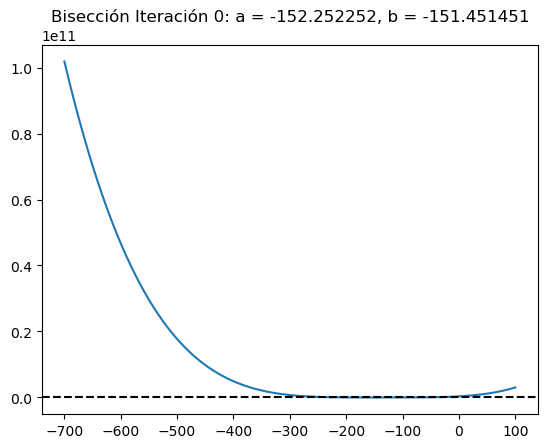

In [55]:
# Animación Bisección
fig, ax = plt.subplots()
ax.plot(x_vals, y_vals)
ax.axhline(0, color='black', linestyle='--')
line_a, = ax.plot([], [], 'g--')
line_b, = ax.plot([], [], 'g--')

def update_bisect(i):
    a, b = steps_bisect[i]
    line_a.set_data([a, a], [0, f(a)])
    line_b.set_data([b, b], [0, f(b)])
    ax.set_title(f'Bisección Iteración {i}: a = {a:.6f}, b = {b:.6f}')
    return line_a, line_b

ani_bisect = FuncAnimation(fig, update_bisect, frames=len(steps_bisect), interval=800, repeat=False)
display(HTML(ani_bisect.to_jshtml()))

## Ejercicio 2

Encuentre todos los puntos en los que la curva (y2)2=(x+32)2−1 interseca el eje y=−2

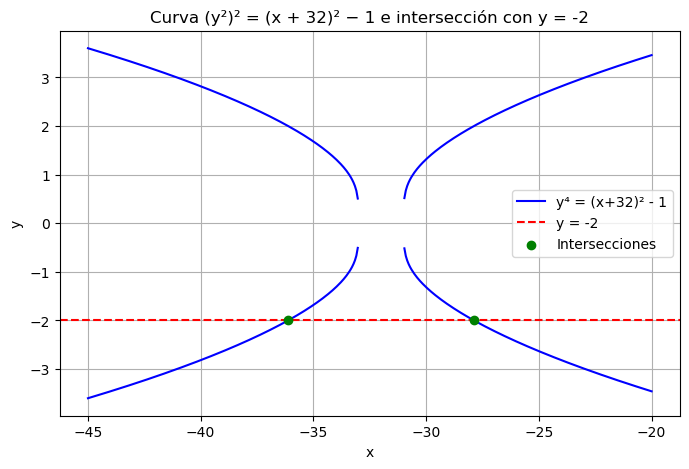

Las intersecciones son aproximadamente:
 x₁ = -27.8769, y = -2
 x₂ = -36.1231, y = -2


In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Ecuación de la curva: (y²)² = (x + 32)² − 1  ⟺  y⁴ = (x + 32)² − 1
def y_curva(x):
    valor = (x + 32)**2 - 1
    valor[valor < 0] = np.nan  # Evitar valores negativos dentro de la raíz cuarta
    return np.power(valor, 1/4)

# Crear valores de x
x = np.linspace(-45, -20, 400)

# Calcular los valores positivos y negativos de y
y_pos = y_curva(x)
y_neg = -y_pos

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(x, y_pos, label='y⁴ = (x+32)² - 1', color='blue')
plt.plot(x, y_neg, color='blue')
plt.axhline(-2, color='red', linestyle='--', label='y = -2')

# Calcular intersecciones exactas (de y=-2)
# Sustituimos en la ecuación: (-2)^4 = (x+32)^2 - 1  → 16 = (x+32)^2 - 1  → (x+32)^2 = 17
x1 = -32 + np.sqrt(17)
x2 = -32 - np.sqrt(17)
plt.scatter([x1, x2], [-2, -2], color='green', zorder=5, label='Intersecciones')

plt.title('Curva (y²)² = (x + 32)² − 1 e intersección con y = -2')

# Detalles del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print(f"Las intersecciones son aproximadamente:\n x₁ = {x1:.4f}, y = -2\n x₂ = {x2:.4f}, y = -2")

 Raíz aproximada (método de Bisección): -36.123106


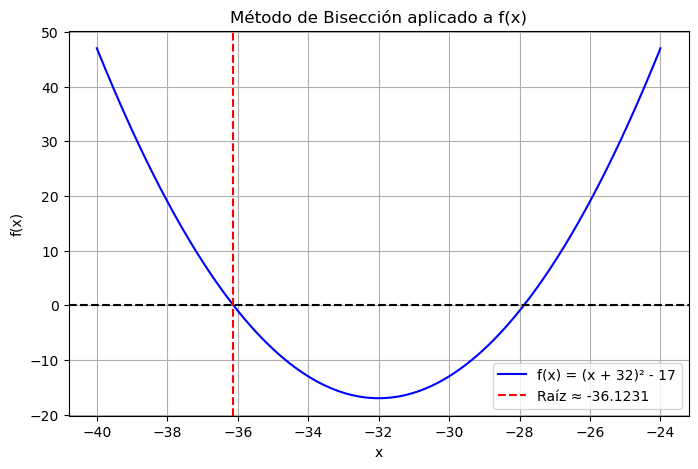

In [57]:
# Método de la Bisección
def f(x):
    return (x + 32)**2 - 17  # Ecuación equivalente a (y²)² = (x + 32)² - 1, con y = -2

def biseccion(f, a, b, tol=1e-6, max_iter=50):
    pasos = []
    for _ in range(max_iter):
        c = (a + b) / 2
        pasos.append((a, b, c))
        if abs(f(c)) < tol:
            break
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, pasos

# Intervalo inicial
a, b = -37, -27
raiz, pasos = biseccion(f, a, b)

print(f" Raíz aproximada (método de Bisección): {raiz:.6f}")

x_vals = np.linspace(-40, -24, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, label='f(x) = (x + 32)² - 17', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(raiz, color='red', linestyle='--', label=f'Raíz ≈ {raiz:.4f}')
plt.title('Método de Bisección aplicado a f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

División por cero detectada, se detiene la iteración.
 Raíz aproximada (método de la Secante): -28.000000


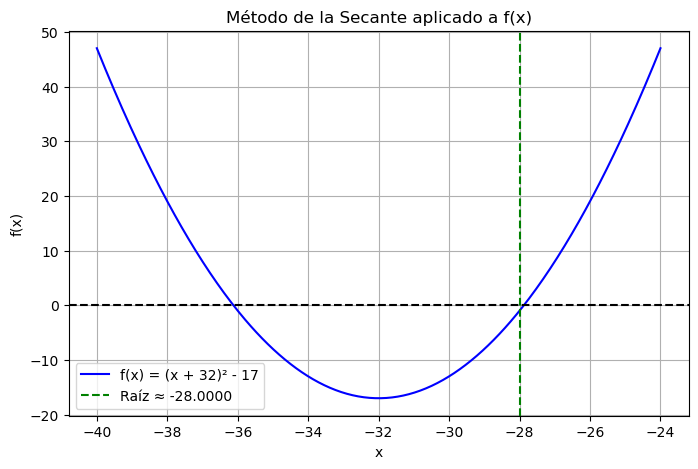

In [58]:
# Método de la Secante
def f(x):
    return (x + 32)**2 - 17

def secante(f, x0, x1, tol=1e-6, max_iter=50):
    pasos = [(x0, x1)]
    x2 = x1  # inicializamos
    for _ in range(max_iter):
        f0, f1 = f(x0), f(x1)
        if f1 - f0 == 0:  # evitar división por cero
            print("División por cero detectada, se detiene la iteración.")
            break
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        pasos.append((x1, x2))
        if abs(x2 - x1) < tol:
            break
        x0, x1 = x1, x2
    return x2, pasos

x0, x1 = -36, -28
raiz, pasos = secante(f, x0, x1)
print(f" Raíz aproximada (método de la Secante): {raiz:.6f}")

x_vals = np.linspace(-40, -24, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, label='f(x) = (x + 32)² - 17', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(raiz, color='green', linestyle='--', label=f'Raíz ≈ {raiz:.4f}')
plt.title('Método de la Secante aplicado a f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

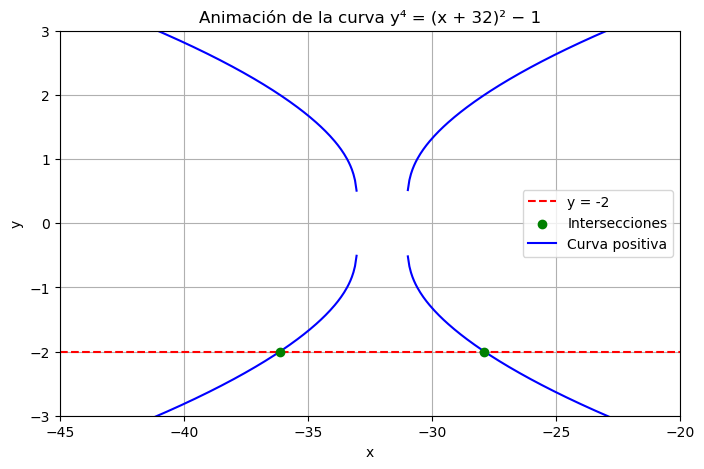

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Ecuación de la curva
def y_curva(x):
    valor = (x + 32)**2 - 1
    valor[valor < 0] = np.nan
    return np.power(valor, 1/4)

# Valores de x
x = np.linspace(-45, -20, 400)
y_pos = y_curva(x)
y_neg = -y_pos

# Intersecciones con y = -2
x1 = -32 + np.sqrt(17)
x2 = -32 - np.sqrt(17)

# Crear figura
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(-45, -20)
ax.set_ylim(-3, 3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Animación de la curva y⁴ = (x + 32)² − 1')
ax.axhline(-2, color='red', linestyle='--', label='y = -2')
ax.scatter([x1, x2], [-2, -2], color='green', zorder=5, label='Intersecciones')
line_pos, = ax.plot([], [], color='blue', label='Curva positiva')
line_neg, = ax.plot([], [], color='blue')
ax.legend()
ax.grid(True)

# Función de actualización
def update(frame):
    line_pos.set_data(x[:frame], y_pos[:frame])
    line_neg.set_data(x[:frame], y_neg[:frame])
    return line_pos, line_neg

# Crear animación
ani = FuncAnimation(fig, update, frames=len(x), interval=20, blit=True)

# Mostrar en Jupyter Notebook
HTML(ani.to_jshtml())

# Guardar como GIF
ani.save('ejercicio2_curva.gif', writer=PillowWriter(fps=30))

## Ejercicio 3

Dada la función f(x)=sin(x)x. ¿A partir de qué valor xT se cumple que f(x)<0.015,∀x≥xT?

 xT por Bisección ≈ 21.660239
 xT por Newton ≈ 21.660239


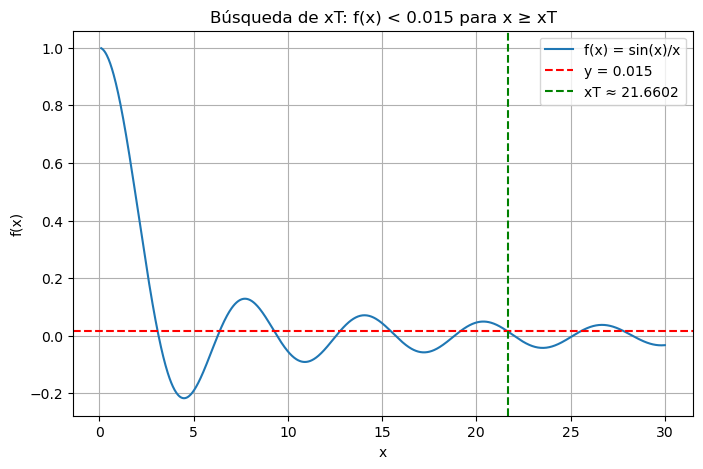

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, bisect

def f(x):
    return np.sin(x)/x - 0.015

def df(x):
    return (x*np.cos(x) - np.sin(x))/x**2

a, b = 20, 25  # f(x) > 0 al inicio, f(x) < 0 al final
raiz_biseccion = bisect(f, a, b, xtol=1e-6)
print(f" xT por Bisección ≈ {raiz_biseccion:.6f}")

x0 = 22  # aproximación inicial
raiz_newton = newton(f, x0, fprime=df, tol=1e-6)
print(f" xT por Newton ≈ {raiz_newton:.6f}")

x_vals = np.linspace(0.1, 30, 1000)  # evitamos x=0
y_vals = np.sin(x_vals)/x_vals

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, label='f(x) = sin(x)/x')
plt.axhline(0.015, color='red', linestyle='--', label='y = 0.015')
plt.axvline(raiz_biseccion, color='green', linestyle='--', label=f'xT ≈ {raiz_biseccion:.4f}')
plt.title('Búsqueda de xT: f(x) < 0.015 para x ≥ xT')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

Link del repositorio GitHub

[Mi repositorio del Taller 2](https://github.com/TamyBenavidez/Taller2)